In [1]:
# single

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 200,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 2
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\tcumi\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


Checkpoint 100, Accuracy: 0.9629629629629629, Loss: 0.2601133629127785
Checkpoint 200, Accuracy: 0.9567901234567902, Loss: 0.2352548528600622
Checkpoint 300, Accuracy: 0.9567901234567902, Loss: 0.2124534183078342
Checkpoint 400, Accuracy: 0.9629629629629629, Loss: 0.18852322189896195
Checkpoint 500, Accuracy: 0.9629629629629629, Loss: 0.17516001948603876


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 0. 1.] <-> [1.0256091e-01 1.2841924e-04 8.9731061e-01]
[1. 0. 0.] <-> [0.9123123  0.01209922 0.07558841]
[1. 0. 0.] <-> [0.94578373 0.02143075 0.03278542]
[0. 1. 0.] <-> [0.8092611  0.16620414 0.02453469]
[1. 0. 0.] <-> [0.92526144 0.00411141 0.07062711]
[1. 0. 0.] <-> [0.9387174  0.04796229 0.0133203 ]
[1. 0. 0.] <-> [0.93903226 0.04646417 0.01450358]
[1. 0. 0.] <-> [0.96935624 0.01174978 0.01889399]
[1. 0. 0.] <-> [0.9090524  0.05845311 0.03249455]
[1. 0. 0.] <-> [0.89950293 0.05806825 0.04242881]
[0. 1. 0.] <-> [0.04645811 0.94252306 0.01101875]
[1. 0. 0.] <-> [0.92149067 0.06570074 0.01280852]
[1. 0. 0.] <-> [0.9343678  0.01587896 0.04975326]
[1. 0. 0.] <-> [0.96060365 0.00909099 0.03030534]
[1. 0. 0.] <-> [0.96695876 0.00938375 0.0236575 ]
[1. 0. 0.] <-> [0.9553757  0.03263798 0.01198644]
[1. 0. 0.] <-> [0.96913147 0.01147289 0.01939572]
[1. 0. 0.] <-> [0.9520176  0.02808144 0.01990097]
[0. 0. 1.] <-> [1.10988766e-01 1.41162163e-04 8.88870060e-01]
[1. 0. 0.] <-> [0.7627871  0.

In [12]:
# Testing Performance

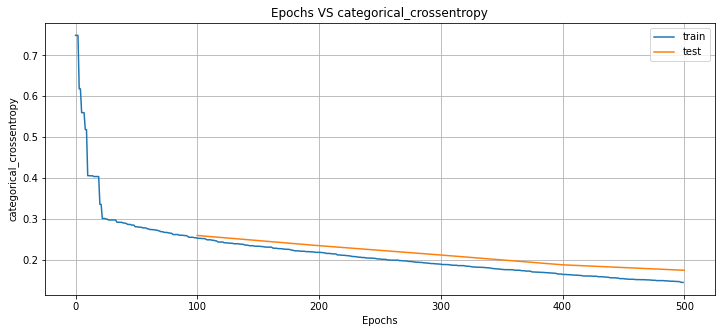

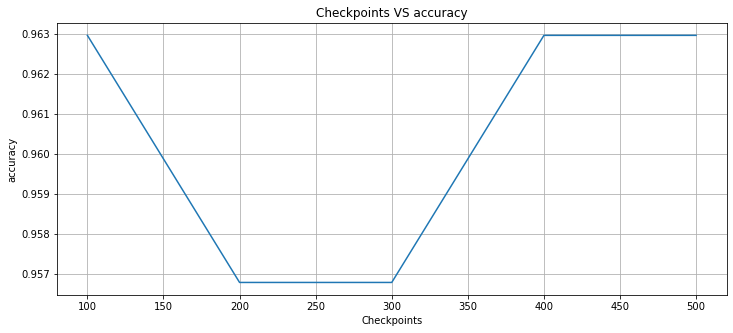

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9629629629629629, 'mean_square_error': 0.12328457356319734, 'categorical_crossentropy': 0.2601133629127785, 'precision': 0.9444444444444444, 'recall': 0.9444444444444444, 'f1': 0.9444444444444444, 'essential_metrics': {0: {'tp_hit': 80, 'fp_hit': 6, 'tn_hit': 22, 'fn_hit': 0}, 1: {'tp_hit': 12, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 3}, 2: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 3}}, 'checkpoint': 100} 


{'accuracy': 0.9567901234567902, 'mean_square_error': 0.11520305769895878, 'categorical_crossentropy': 0.2352548528600622, 'precision': 0.9351851851851852, 'recall': 0.9351851851851852, 'f1': 0.9351851851851852, 'essential_metrics': {0: {'tp_hit': 80, 'fp_hit': 7, 'tn_hit': 21, 'fn_hit': 0}, 1: {'tp_hit': 11, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 4}, 2: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 3}}, 'checkpoint': 200} 


{'accuracy': 0.9567901234567902, 'mean_square_error': 0.10569861700128856, 'categorical_crossentropy': 0.2124534183078342, 'precisio

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[ 1.5203224 -2.6053376 -2.2210937 -1.7491741 -1.230463 ]
 bias: 1.61735999584198

Neuron 1: weights:
[ 1.6969657   0.08463811 -2.1400034   1.3481704   1.4191934 ]
 bias: -1.9126734733581543

Neuron 2: weights:
[ 1.7004243  -2.734622   -1.301702    0.17683482 -1.1153092 ]
 bias: 2.1011273860931396

Neuron 3: weights:
[ 0.10537651  3.          2.8454635  -2.2120047   0.37364036]
 bias: 1.8881803750991821

$
Layer 2
Neuron 0: weights:
[ 1.315277  -2.4038596  1.4659231 -0.5680684]
 bias: 0.5702229738235474

Neuron 1: weights:
[-2.8343189 -2.516487  -3.         2.641903 ]
 bias: 2.279660701751709

Neuron 2: weights:
[ 0.04577537  2.5394115  -2.2482452  -3.        ]
 bias: 2.7357282638549805

$

